## Financial Data Preprocessing


In [ ]:
import sys

sys.path.append("..")

In [ ]:
from config import config, config_indicators
from preprocessor.findata_downloader import FinancialDataDownloader
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser

In [ ]:
findownloader = FinancialDataDownloader(config.START_DATE, config.END_DATE)
data = findownloader.load_data(f"../{config.DATA_DIR}", config.TEST_NAME)

Data loaded from ../data/test.csv


In [ ]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
data = finpreprocessor.preprocess(
    data,
    config.EXCHANGE_NYSE,
    config.USE_TECHNICAL_INDICATORS,
    list(config_indicators.TECHNICAL_INDICATORS.keys()),
    config.USE_MACROECONOMIC_INDICATORS,
    list(config_indicators.MACROECONOMIC_INDICATORS.keys()),
)

Data downloaded for 1 tickers from 2016-01-01 to 2025-07-01.


In [ ]:
data.head()

,date,tic,open,high,low,close,volume,day,close_5_sma,close_5_ema,macd,rsi,cci,boll,atr,adx,vwma,vix
0,2016-01-04,AAPL,23.184077,23.807681,23.046251,23.803162,270597600.0,0,23.803162,23.803162,0.000000,0.000000,0.000000,23.803162,0.761431,0.000000,23.552365,20.700001
1,2016-01-05,AAPL,23.893546,23.916140,23.138894,23.206676,223164000.0,1,23.504919,23.445271,-0.013383,0.000000,-66.666667,23.504919,0.769631,100.000000,23.492798,19.340000
2,2016-01-06,AAPL,22.720891,23.129851,22.564992,22.752523,273829600.0,2,23.254121,23.117127,-0.031135,0.000000,-100.000000,23.254121,0.723785,83.580897,23.251282,20.590000
3,2016-01-07,AAPL,22.296120,22.623738,21.787747,21.792265,324377600.0,3,22.888657,22.566800,-0.073116,0.000000,-114.395391,22.888657,0.790886,85.560930,22.899755,24.990000
4,2016-01-08,AAPL,22.266751,22.393279,21.862311,21.907499,283192000.0,4,22.692425,22.313703,-0.089804,6.142317,-84.116521,22.692425,0.747086,86.497431,22.725660,27.010000


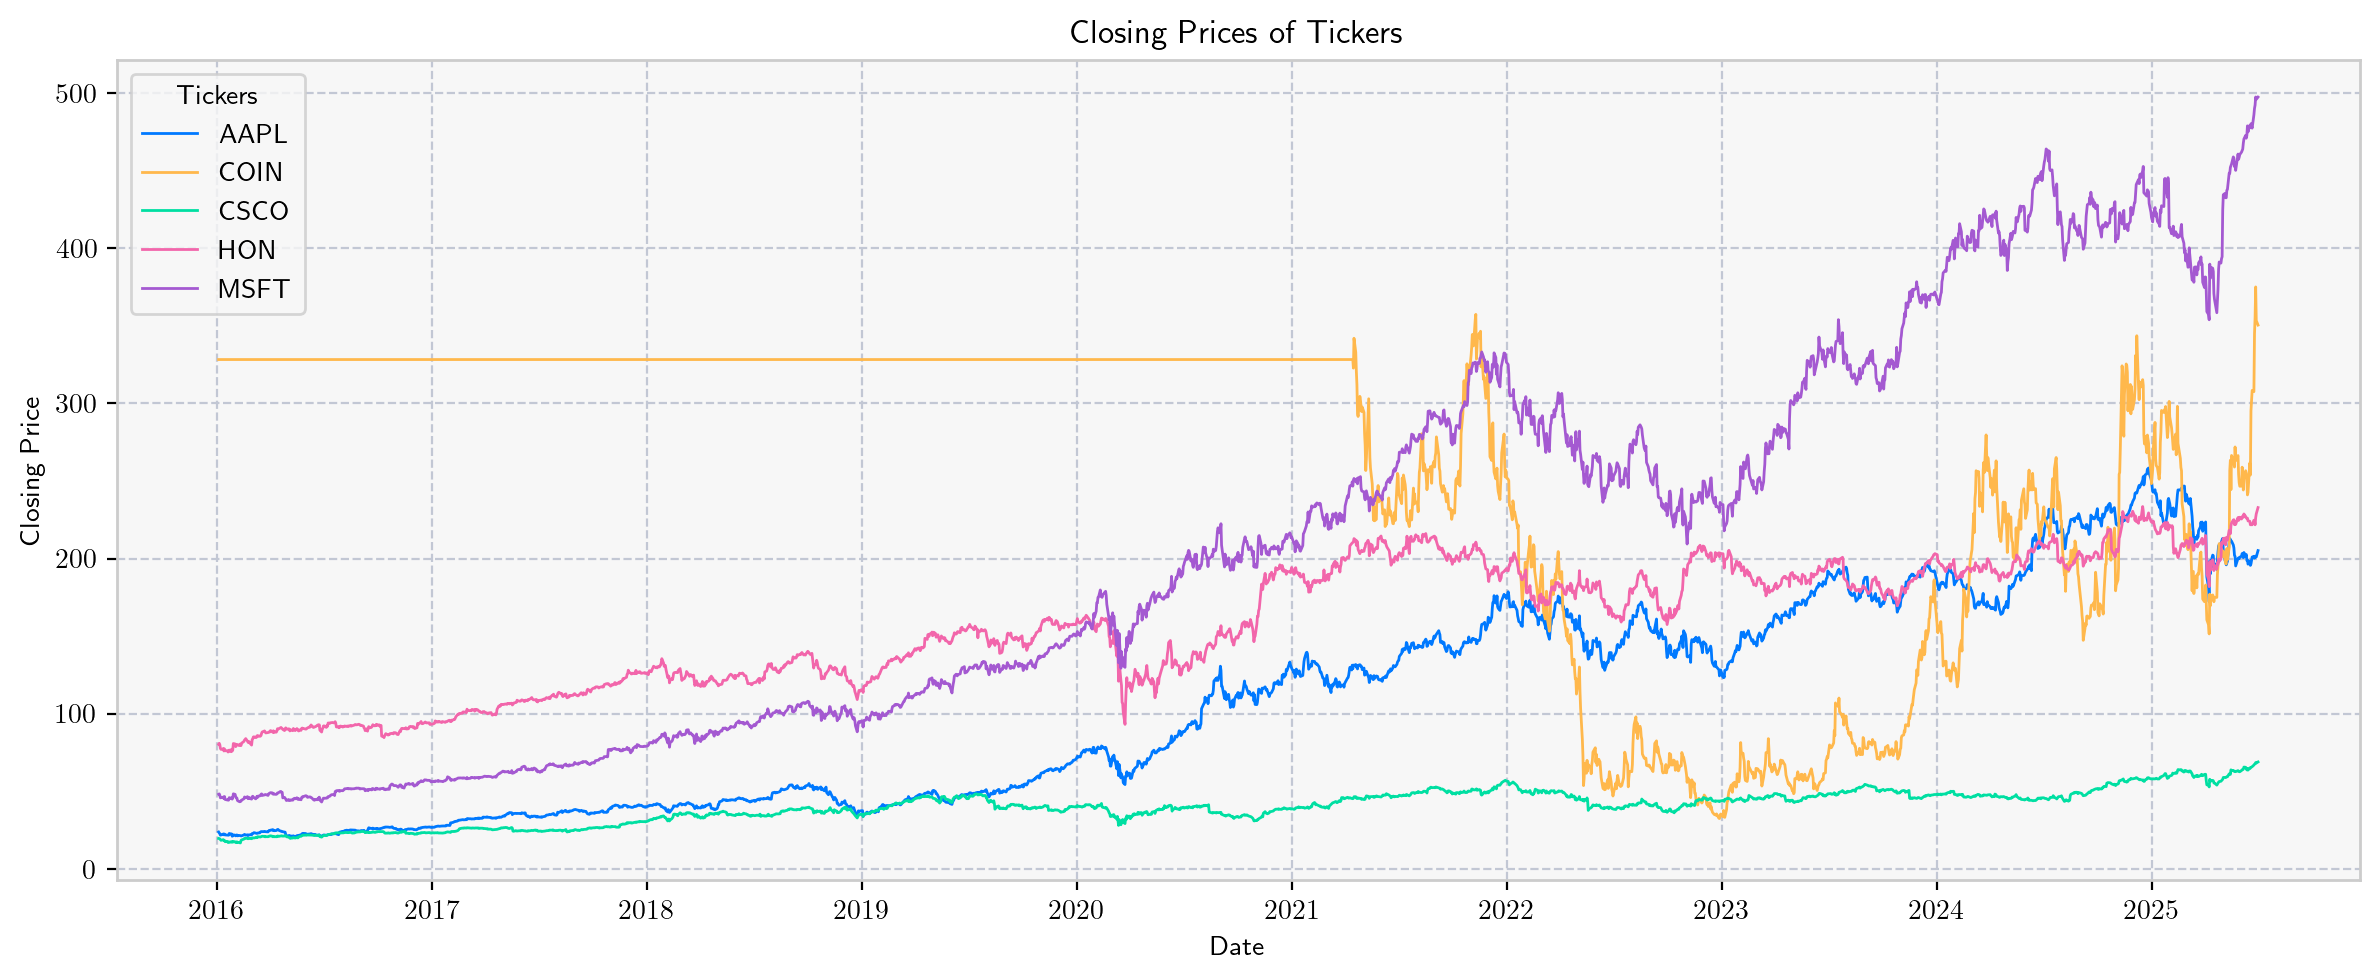

In [ ]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_close_prices(
    data, f"../{config.PLOT_DIR}", f"{config.TEST_NAME}_processed"
)

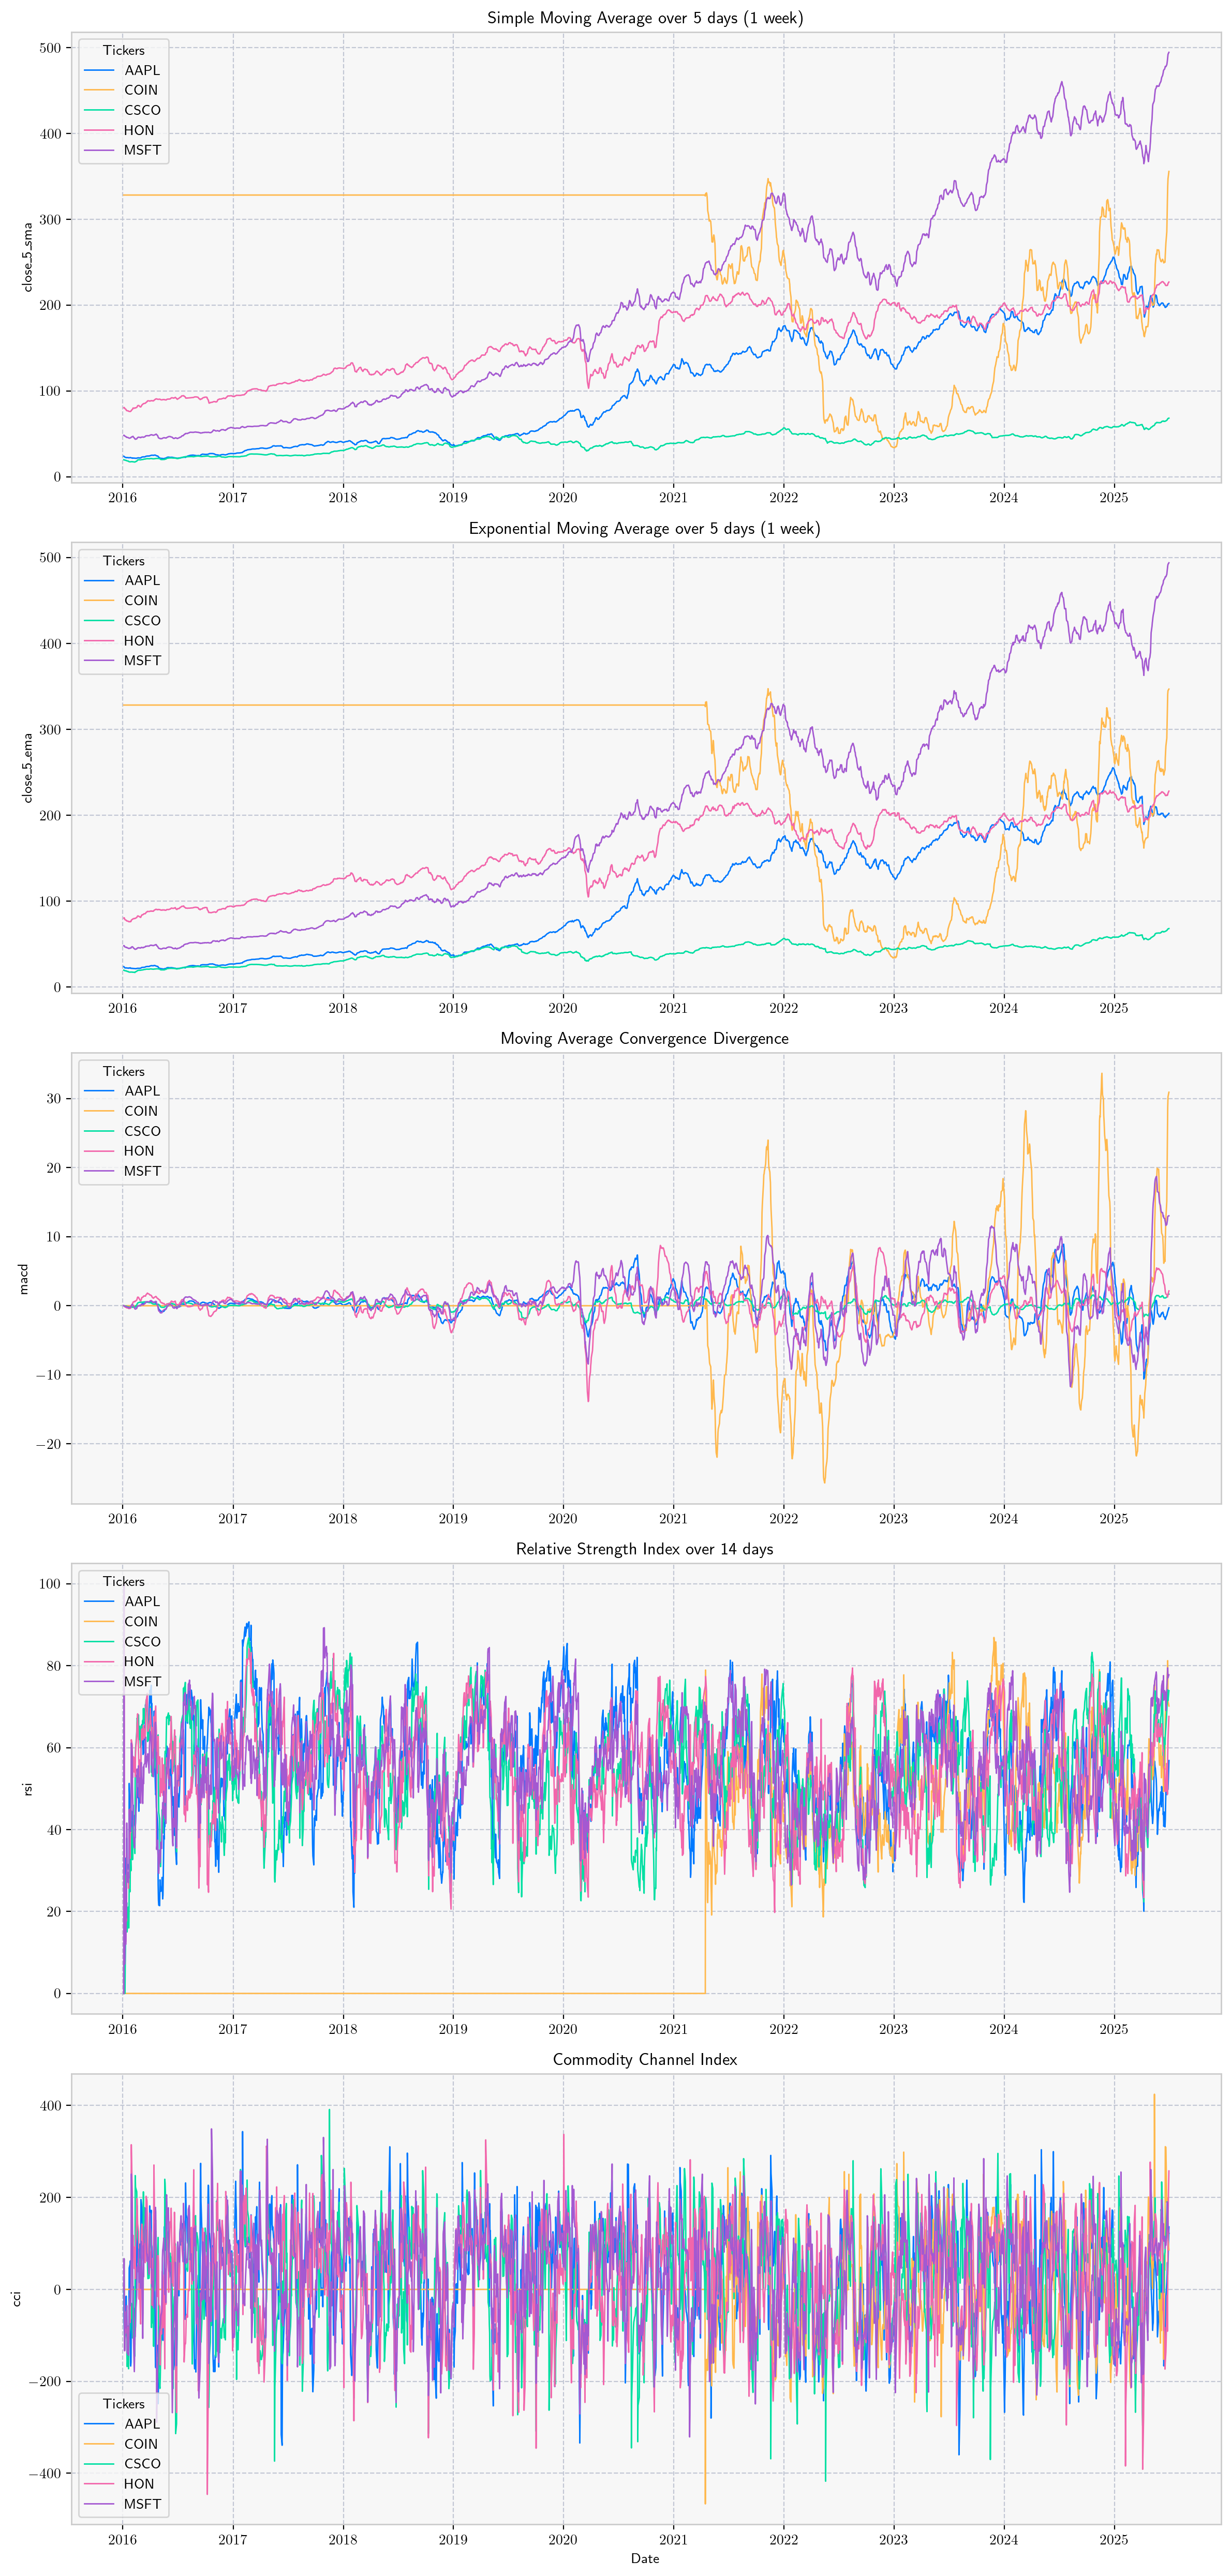

In [ ]:
finvisualiser.plot_technical_indicators(
    data,
    config_indicators.TECHNICAL_INDICATORS,
    f"../{config.PLOT_DIR}",
    config.TEST_NAME,
)

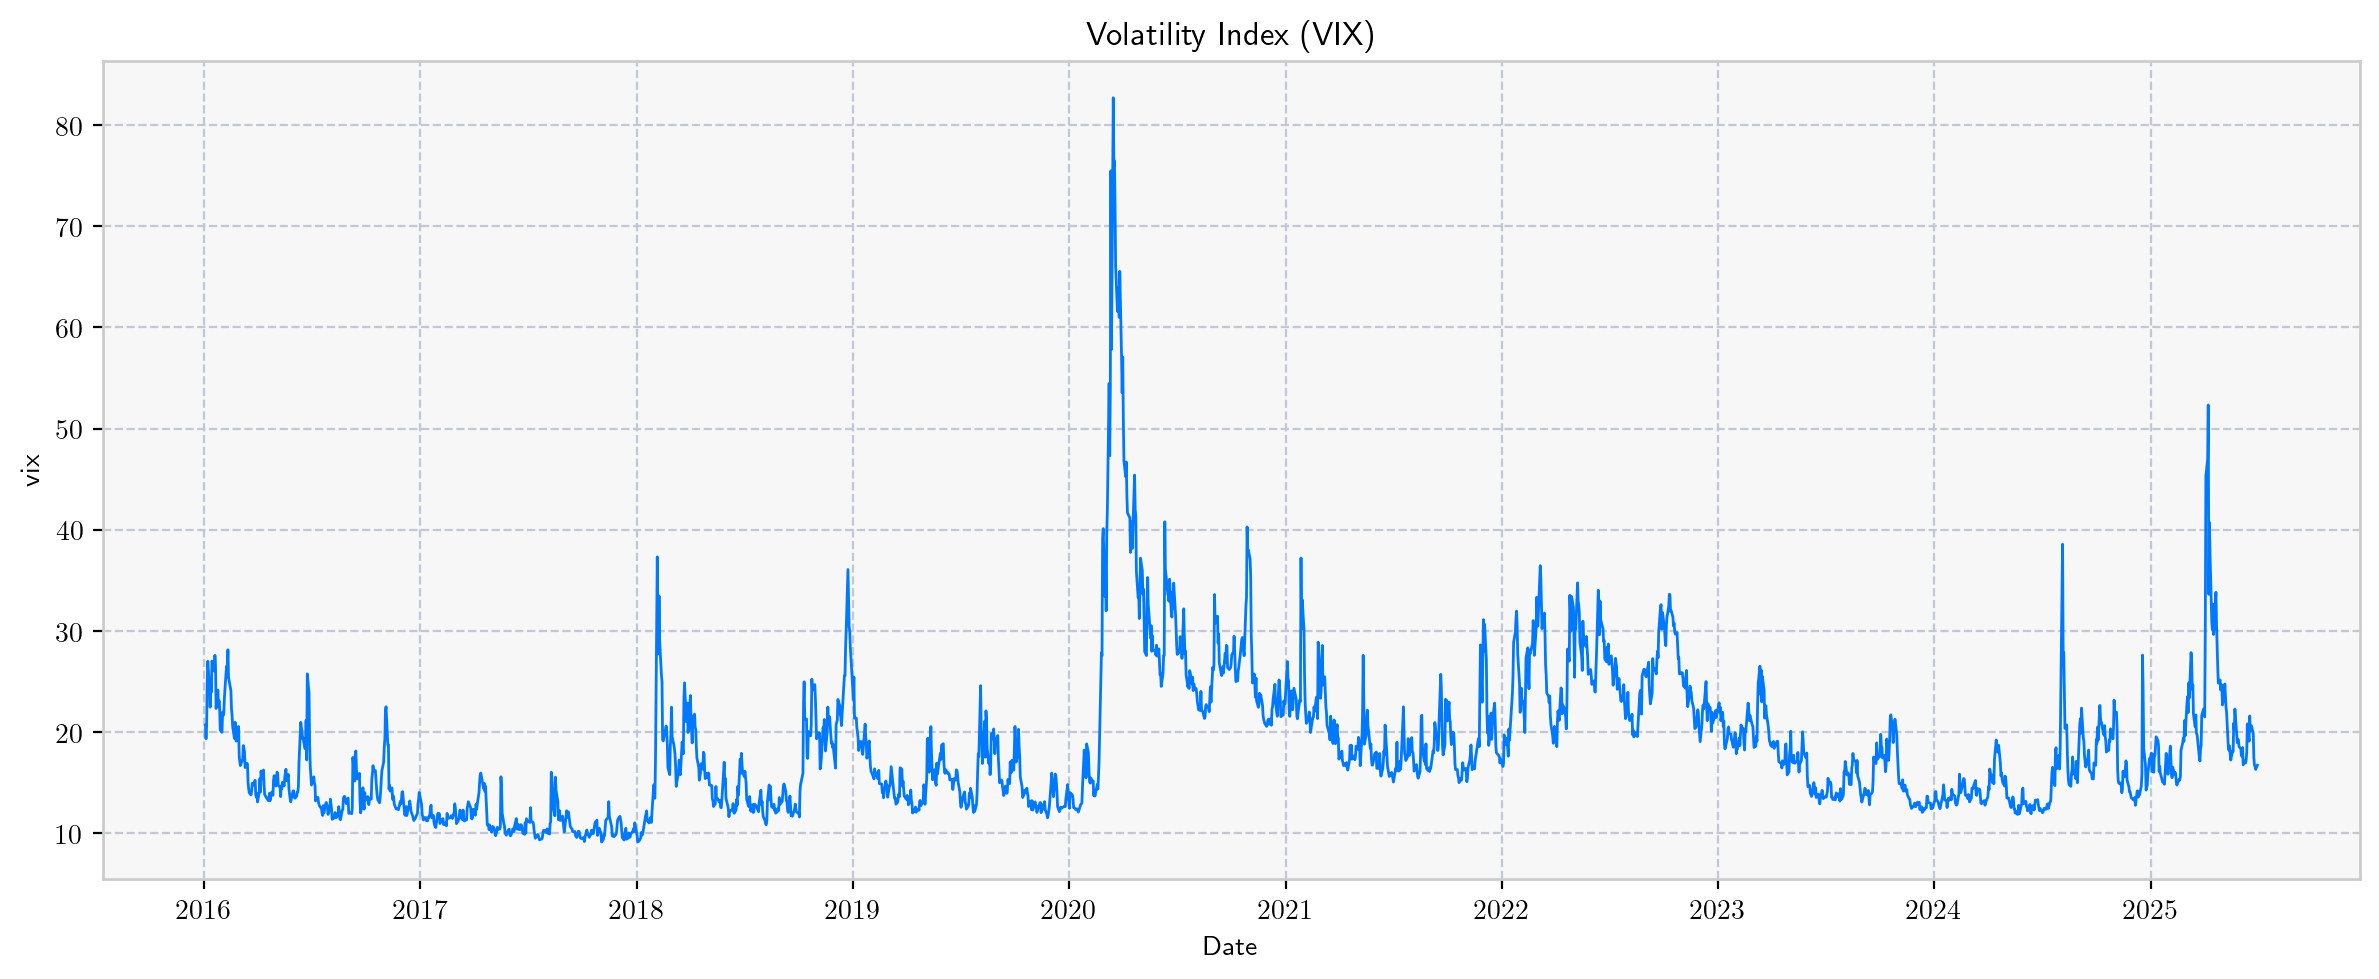

In [ ]:
finvisualiser.plot_macroeconomic_indicators(
    data,
    config_indicators.MACROECONOMIC_INDICATORS,
    f"../{config.PLOT_DIR}",
    config.TEST_NAME,
)

In [ ]:
train_data, test_data = finpreprocessor.split_train_test(
    data, config.TRAIN_END_DATE
)

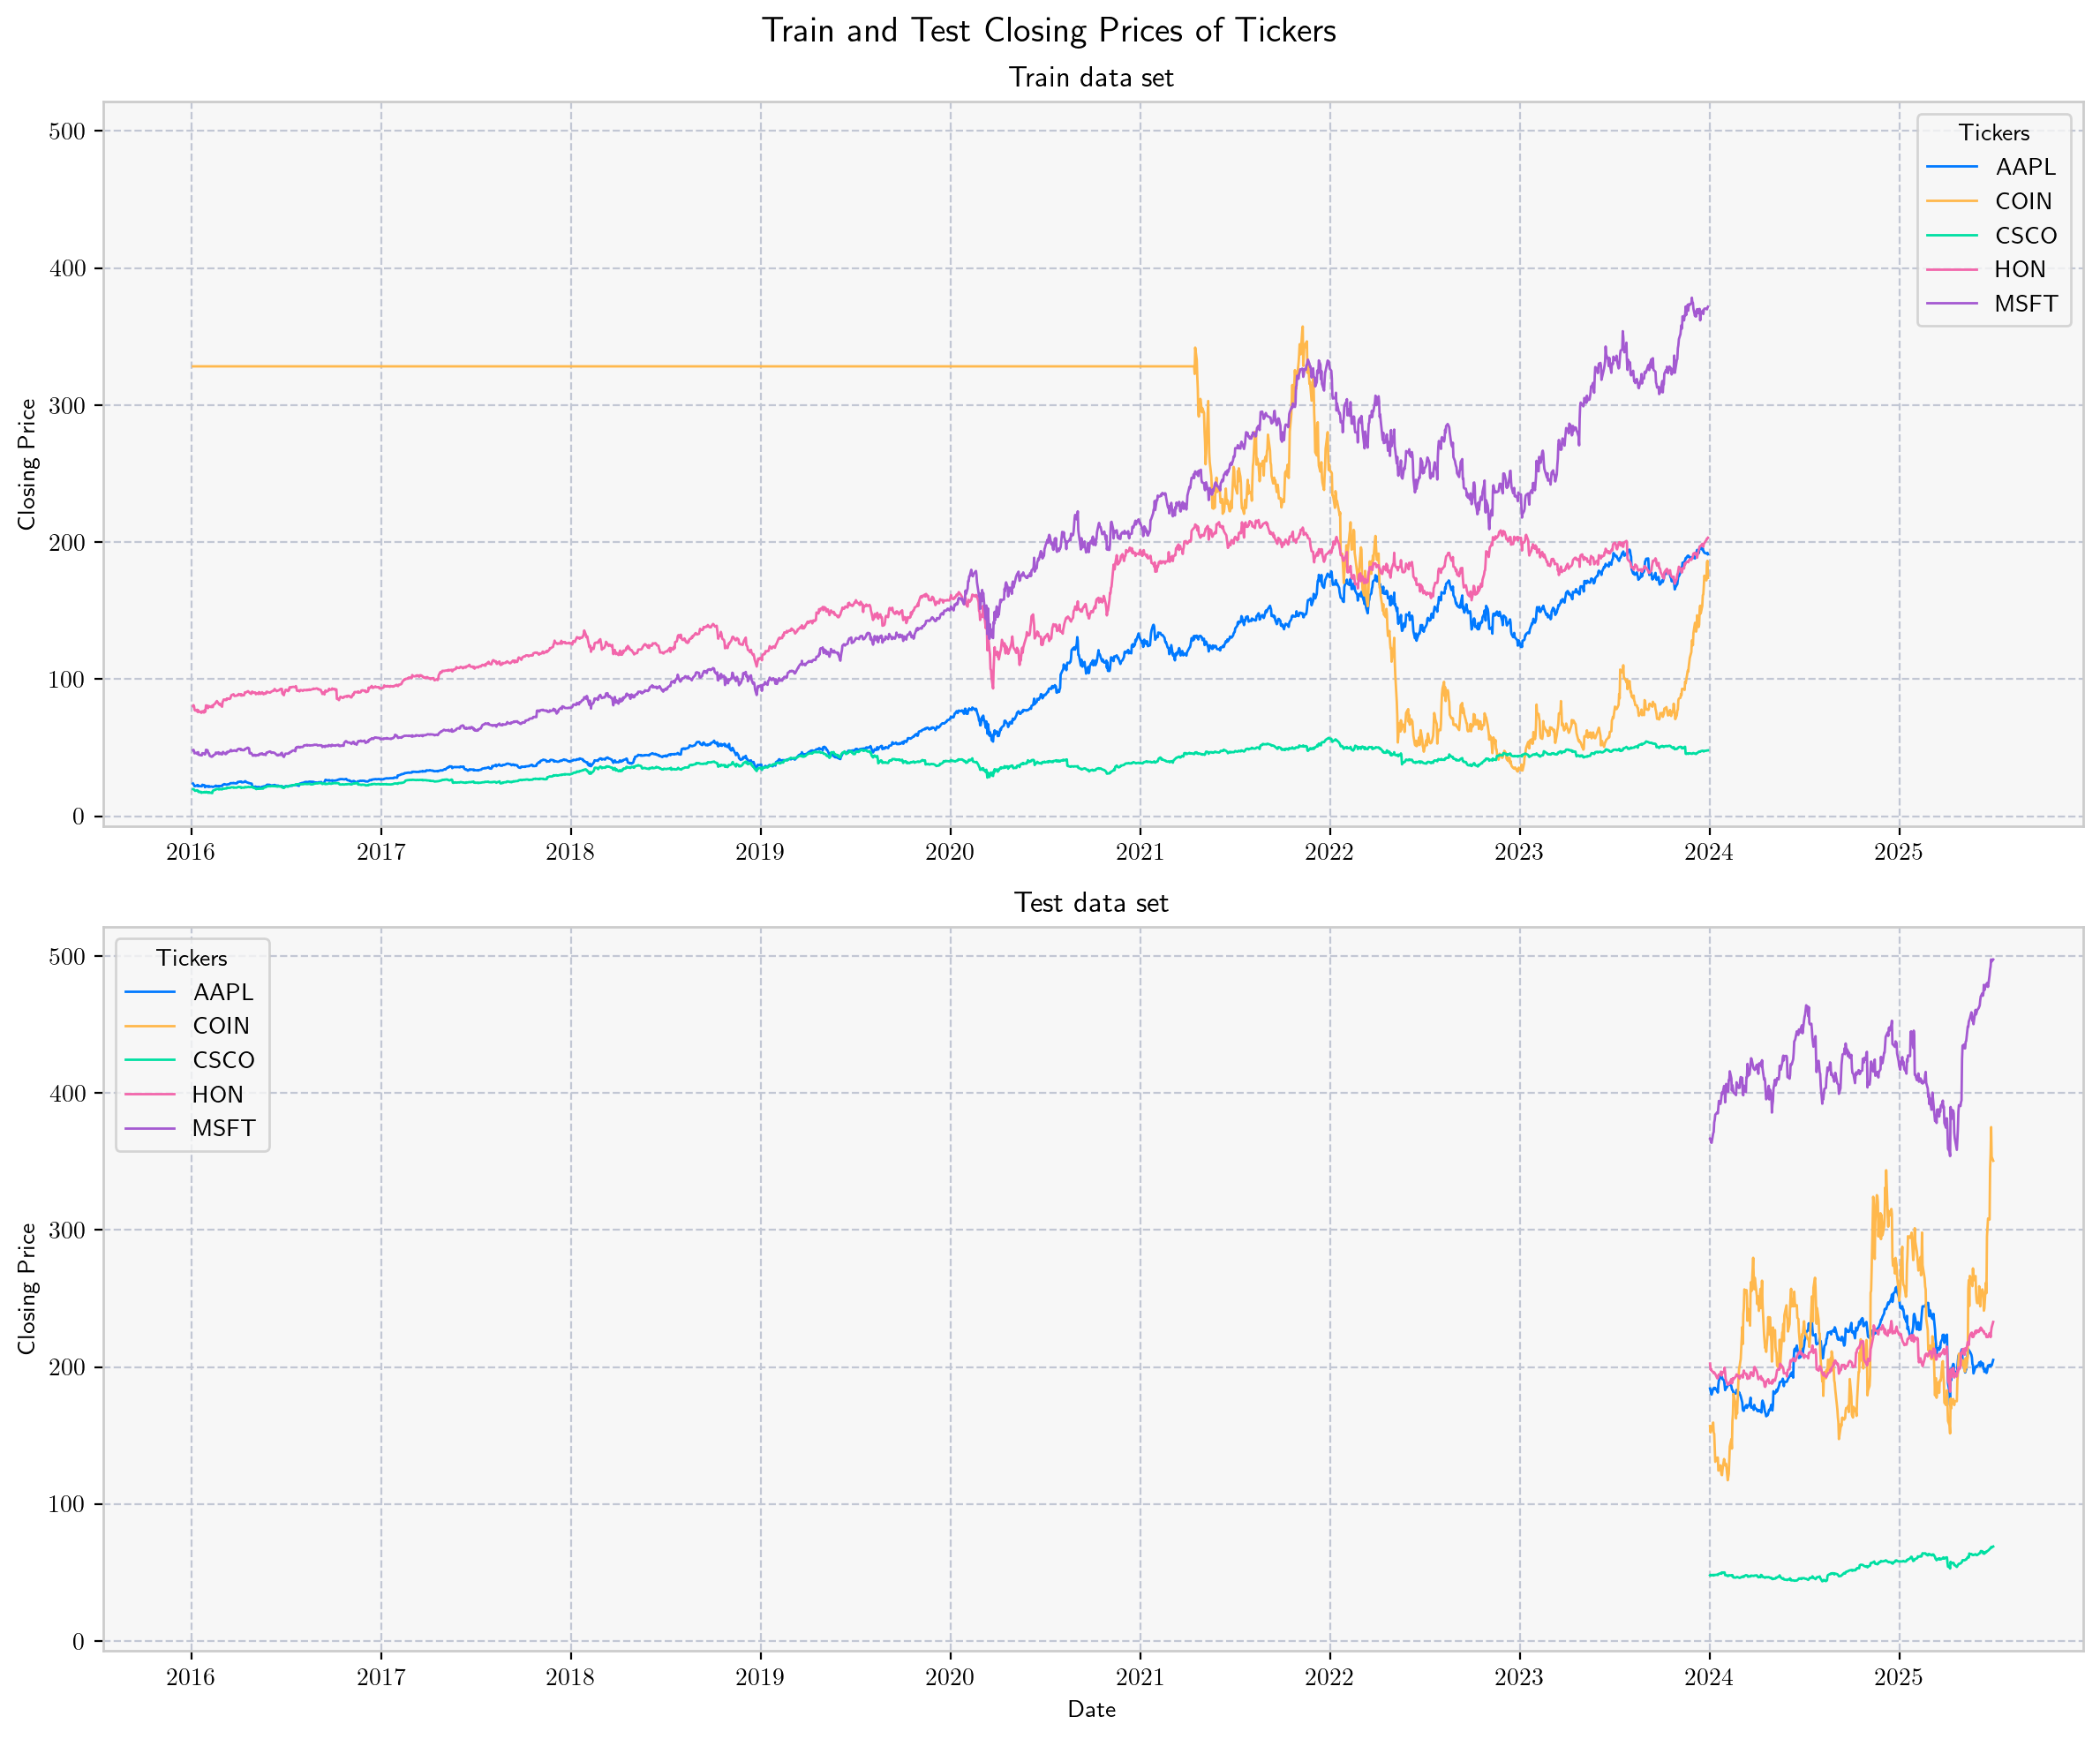

In [ ]:
finvisualiser.plot_train_test_close_prices(
    train_data, test_data, f"../{config.PLOT_DIR}", config.TEST_NAME
)

In [ ]:
finpreprocessor.save_train_test_data(
    train_data, test_data, f"../{config.DATA_DIR}", config.TEST_NAME
)

Train data saved to ../data/test_train.csv
Test data saved to ../data/test_trade.csv
